In [1]:
%run 'FastICA.ipynb'

/home/creison/miniconda2/lib/python2.7/site-packages/matplotlib/pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


(165, 3)
(3, 64)
Sources 03
(165, 4)
(4, 64)
Sources 04
(165, 5)
(5, 64)
Sources 05
(165, 6)
(6, 64)
Sources 06
(165, 7)
(7, 64)
Sources 07
(165, 8)
(8, 64)
Sources 08
(165, 9)
(9, 64)
Sources 09
(165, 48)
(48, 64)
Sources 48
(165, 64)
(64, 64)
Sources 64


ImportError: No module named hypertools

In [2]:
#Path to folders(Analysis) with sources numbers
if (algorithm=='parallel'):
    def path_image_analysis_serpentina(number,cont):
        #number=Number of components that were used in the function "calc_ICA"
        N=str(number)
        if cont==1:
            analysis_image_path = home_path+'/MultiAnodePMT/analysis/'+data_region+'/algorithm/parallel/fastICA_images/'+N+'_Sources/serpentine_method/Analysis/3_Warmer_Pixels' 
        if cont==2:
            analysis_image_path = home_path+'/MultiAnodePMT/analysis/'+data_region+'/algorithm/parallel/fastICA_images/'+N+'_Sources/serpentine_method/Analysis/50% of the value of the Warmer Pixels' 

        return analysis_image_path
    def path_image_analysis_patches(number,cont):
        #number=Number of components that were used in the function "calc_ICA"
        N=str(number)
        if cont==1:
            analysis_image_path = home_path+'/MultiAnodePMT/analysis/'+data_region+'/algorithm/parallel/fastICA_images/'+N+'_Sources/patches_method/Analysis/3_Warmer_Pixels' 
        if cont==2:
            analysis_image_path = home_path+'/MultiAnodePMT/analysis/'+data_region+'/algorithm/parallel/fastICA_images/'+N+'_Sources/patches_method/Analysis/50% of the value of the Warmer Pixels' 

        return analysis_image_path
    
if (algorithm=='deflation'):
    def path_image_analysis_serpentina(number,cont):
        #number=Number of components that were used in the function "calc_ICA"
        N=str(number)
        if cont==1:
            analysis_image_path = home_path+'/MultiAnodePMT/analysis/'+data_region+'/algorithm/deflation/fastICA_images/'+N+'_Sources/serpentine_method/Analysis/3_Warmer_Pixels' 
        if cont==2:
            analysis_image_path = home_path+'/MultiAnodePMT/analysis/'+data_region+'/algorithm/deflation/fastICA_images/'+N+'_Sources/serpentine_method/Analysis/50% of the value of the Warmer Pixels' 

        return analysis_image_path
    def path_image_analysis_patches(number,cont):
        #number=Number of components that were used in the function "calc_ICA"
        N=str(number)
        if cont==1:
            analysis_image_path = home_path+'/MultiAnodePMT/analysis/'+data_region+'/algorithm/deflation/fastICA_images/'+N+'_Sources/patches_method/Analysis/3_Warmer_Pixels' 
        if cont==2:
            analysis_image_path = home_path+'/MultiAnodePMT/analysis/'+data_region+'/algorithm/deflation/fastICA_images/'+N+'_Sources/patches_method/Analysis/50% of the value of the Warmer Pixels' 

        return analysis_image_path

In [3]:
def highest_N_value(array,number):
    #Returns the highest values
    """
        Private method that returns the N highest values
        
        Args:
        ----
        array(array): Matrix returned by function "calc_ICA"
        number(int)= Number of values to be returned
        -------
        Returns:
        result(array)=The N_highest values
        returnArgs(array)=The index of highest values
    """  
    #Return the largest n elements
    result=heapq.nlargest(number,array)
    resultArgs=map(array.tolist().index, heapq.nlargest(number,array))
    return result,resultArgs

In [4]:
def count_number_highest_value (matrix):
    
    #It counts all values greater than 50% of the highest value
    y=np.amax(matrix)*0.5
    count = sum(x > y for x in matrix )
    return count

In [5]:
def analysis_image(method,source): 
    """
        Private method that creates images of the most significant N channelss
        
        Args:
        ----
        
        Method(string)='Serpentine' or 'Patches'
        source(array)= Matrix returned by function "calc_ICA"
      
        
        
        Returns:
        Image
        -------
        Returns:
        Image
    """  
    #seletor select folder
    for seletor in range(1, 3):

        number_sources=source.shape[0]
        total_sum=np.zeros(165)
        for cont in range(number_sources):
            #Define soma 
            soma=np.zeros(165)

            #position in the vector desvector
            channel=np.array([])
            comparator=np.array(range(64))

            if (method=='Serpentine'):
                    #Use desvetor_serpentina in matshow
                    T=desvector_serpentina(comparator)

            if(method=='Patches'):
                    #Use desvetor_patches in matshow
                    T=desvector_patches(ordem,comparator)

            if seletor==1:
                N_highest_values = 3

            if seletor==2:
                N_highest_values = count_number_highest_value(source[cont])

            for num in range(N_highest_values):
                results=highest_N_value(source[cont],N_highest_values)


                #Create the image
                if (method=='Serpentine'):
                    #Use desvetor_serpentina in matshow
                    Matrix=desvector_serpentina(source[cont])
                    path=path_image_analysis_serpentina(number_sources,seletor)
                if(method=='Patches'):
                    #Use desvetor_patches in matshow
                    Matrix=desvector_patches(ordem,source[cont])
                    path=path_image_analysis_patches(number_sources,seletor)

                #position in the matrix 8X8
                position=np.argwhere(T==(results[1][num]))

                #Hottest pixel channel number
                channel=np.append(channel,(pixel_map[position[0][0],position[0][1]]))


            plt.figure(figsize=(15,10))
            plt.plot(data_array[:,7],label='Single-Anode PMT' )

            for num1 in range(N_highest_values):
                if channel[num1]!=0:
                    plt.plot(data_array[:,int((channel[num1]-1))],label='0'+str(num1+1)+' MA_PMT Channel: '+str(int(round(channel[num1]))))



            leg = plt.legend(bbox_to_anchor=(0.730, 0.999), loc="best", borderaxespad=0.,fontsize = 'x-large')
            leg.set_title("Plot Warmer Pixels", prop = {'size':'x-large'})
            leg._legend_box.align = "left"

            N=str(number_sources)
            X= str(cont+1)
            plt.title('0'+str(number_sources)+' Sources :'+' Analysis '+X+ ' FastICA Method '+method, fontsize = 20)
            plt.text(150, 1360, r'Ordem Decrescente')

            # hide tick and tick label of the big axes
            plt.xlabel("Triggers",fontsize=15)
            plt.ylabel("ADC Counts",fontsize=15)

            plt.savefig(path+'/analysis_'+N+'_image_'+X+'.png', bbox_inches='tight')



            plt.clf()
           
            #Plot Sum Pixels
            plt.figure(figsize=(15,10))
            plt.plot(data_array[:,7],label='Single-Anode PMT' )

            for num1 in range(N_highest_values):
                if channel[num1]!=0:
                    plt.plot(data_array[:,int((channel[num1]-1))],label='0'+str(num1+1)+' MA_PMT Channel: '+str(int(round(channel[num1]))))
                    soma=np.sum([soma,data_array[:,int((channel[num1]-1))]], axis=0)
            
            plt.plot(soma,label="Sum Pixels") 

            plt.title('0'+str(number_sources)+' Sources :'+' Sum Analysis '+X+ ' FastICA Method '+method , fontsize = 20)
            leg = plt.legend(bbox_to_anchor=(0.730, 0.999), loc="best", borderaxespad=0.,fontsize = 'x-large')
            leg.set_title("Plot Warmer Pixels", prop = {'size':'x-large'})
            leg._legend_box.align = "left"

            # hide tick and tick label of the big axes
            plt.xlabel("Triggers",fontsize=15)
            plt.ylabel("ADC Counts",fontsize=15)

            plt.savefig(path+'/Sum_analysis_'+N+'_image_'+X+'.png', bbox_inches='tight')



            plt.clf()
            
            #Todas as somas no mesmo grafico
            plt.figure(figsize=(15,10))

            plt.plot(data_array[:,7],label='Single-Anode PMT' )
            plt.plot(soma,label="Sum Pixels")  


            total_sum=np.vstack([total_sum,soma])

        for item in range(1,number_sources+1, 1):
            plt.plot(total_sum[item])


        # hide tick and tick label of the big axes
        plt.xlabel("Triggers",fontsize=15)
        plt.ylabel("ADC Counts",fontsize=15)


        plt.savefig(path+'/All_Sum_analysis.png', bbox_inches='tight')
        

In [6]:
#Method Serpentine

IOError: [Errno 2] No such file or directory: '/home/creison/Documentos/TileCal/MultiAnodePMT/analysis/data_array_region1/algorithm/deflation/fastICA_images/3_Sources/serpentine_method/Analysis/50% of the value of the Warmer Pixels/analysis_3_image_1.png'

<Figure size 1080x720 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

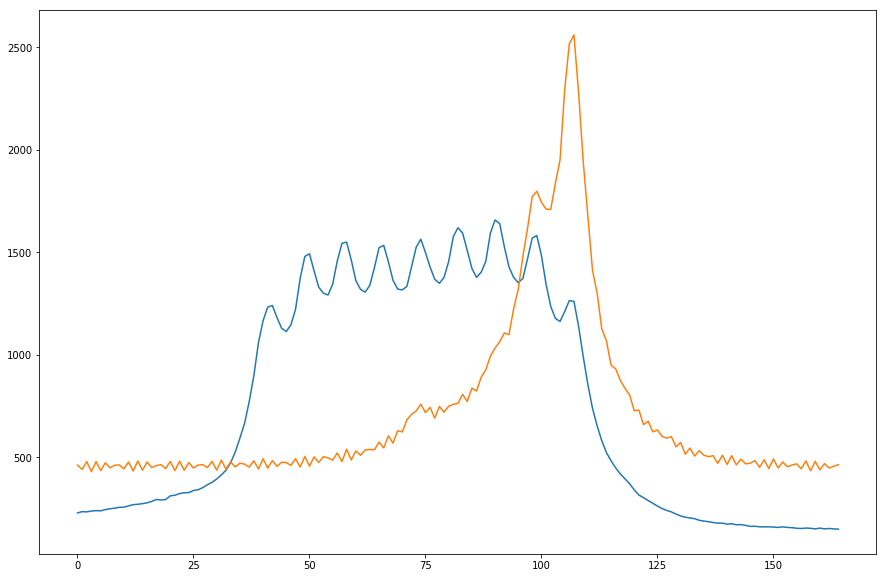

<Figure size 1080x720 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

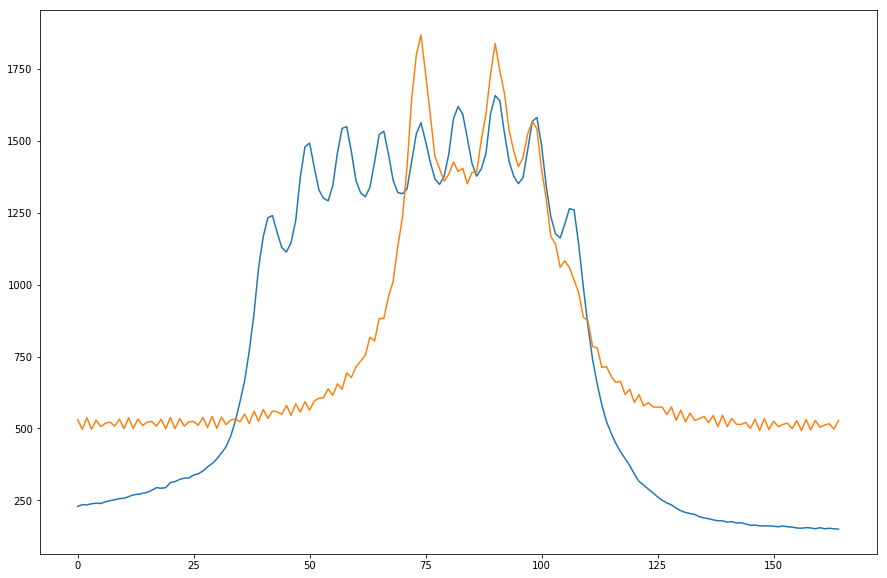

<Figure size 1080x720 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

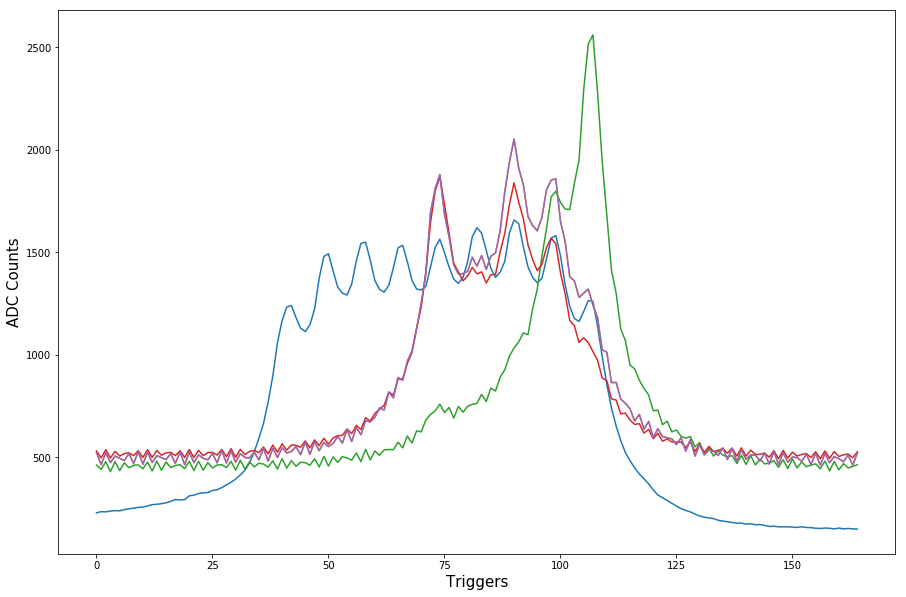

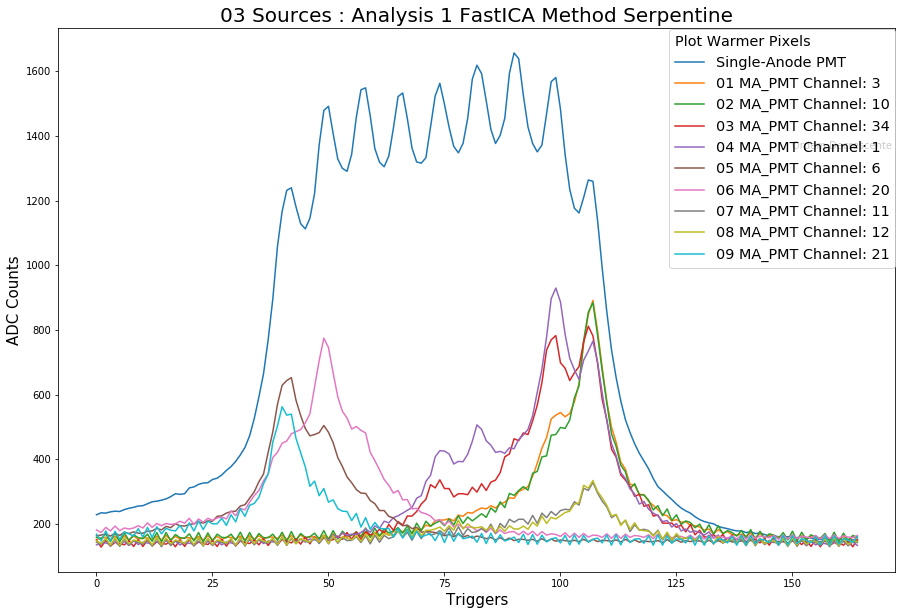

In [7]:
analysis_image('Serpentine',sources03)

In [ ]:
analysis_image('Serpentine',sources04)
plt.close('all')

In [ ]:
analysis_image('Serpentine',sources05)
plt.close('all')

In [ ]:
analysis_image('Serpentine',sources06)
plt.close('all')

In [ ]:
analysis_image('Serpentine',sources07)

In [ ]:
analysis_image('Serpentine',sources08)

In [ ]:
analysis_image('Serpentine',sources09)

In [ ]:
analysis_image('Serpentine',sources48)

In [ ]:
analysis_image('Serpentine',sources64)

In [41]:
#Method Patches

In [42]:
#analysis_image('Patches',psources03)

In [43]:
#analysis_image('Patches',psources04)

In [44]:
#analysis_image('Patches',psources05)

In [45]:
#analysis_image('Patches',psources06)

In [46]:
#analysis_image('Patches',psources07)

In [47]:
#analysis_image('Patches',psources08)

In [48]:
#analysis_image('Patches',psources09)

In [49]:
#analysis_image('Patches',psources48)

In [50]:
#analysis_image('Patches',psources64)